<a href="https://colab.research.google.com/github/praveenpareek11/HotelReviewAnalysis/blob/master/review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''Import necessary libraries.'''
import re
import time
import nltk
import pandas
import operator
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from scipy.sparse import coo_matrix

In [0]:
from tqdm import tqdm
from pprint import pprint
from collections import OrderedDict 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
dataset = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/data/Hotel_Reviews.csv')

In [0]:
import nltk
nltk.download('stopwords')
stoplist = set(stopwords.words("english"))
stoplist = stoplist|{'one', 'us', 'would', 'like', 'even', 'get'}
'''
    Extra words to be added: 
        'also', ''
'''

In [0]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [0]:
def sort_dict(d):
    sorted_x = sorted(d.items(), key=operator.itemgetter(1), reverse= True)
    return sorted_x

In [0]:
def clean_text(text):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

In [0]:
# def word_cloud(corpus):
#     wordcloud = WordCloud(background_color='white',
#                           stopwords=stopwords,
#                           max_words=100,
#                           max_font_size=50, 
#                           random_state=42).generate(str(corpus))
#     fig = plt.figure(1)
#     plt.imshow(wordcloud)
#     plt.axis('off')
#     plt.show()
#     fig.savefig("word1.png", dpi=900)

In [0]:
def normalize(d):
    '''
    Purpose:
        To normalize the value of occurance of keywords.
    Args:
        words_freq: (list) - list of keywords and occurance of each keyword(tuple).
    Return:
        Normalized value of the keywords: (list) - list of keywords and occurance of each keyword(tuple).
    '''
    min_val = min(d.values())
    max_val = max(d.values())
    for key, val in d.items():
        try:
            val = (val - min_val)/(max_val - min_val)
        except ZeroDivisionError:
            val = 0
        d[key] = val
    return d

In [0]:
def uni_gram(text_list):
    '''
    Purpose:
        To get unigram keyword's list from text of negative reviews.
    Args:
        text_list: (list) - list of cleaned reviews(string).
    Return:
        words_freq: (list) - list of keywords and occurance(normalized) of each keyword(tuple).
    '''
    d = dict()
    for text in tqdm(text_list):
        for w in text.split():
            if(w in stoplist):    continue
            d[w] = d.get(w, 0)+1
    normalized_d = normalize(d)
    words_freq = sort_dict(normalized_d)
    return words_freq[:100], normalized_d

In [0]:
def bi_gram(text_list):
    '''
    Purpose:
        To get bigram keyword's list from text of negative reviews.
    Args:
        text_list: (list) - list of cleaned reviews(string).
    Return:
        words_freq: (list) - list of keywords and occurance(normalized) of each keyword(tuple).
    '''
    d = dict()
    for text in tqdm(text_list):
        for b in nltk.ngrams(text.split(),2):
            if(b[0] in stoplist or b[1] in stoplist):   continue 
            w = "{} {}".format(b[0],b[1])
            d[w] = d.get(w, 0)+1
    normalized_d = normalize(d)
    words_freq = sort_dict(d)
    return words_freq[:100], normalized_d

In [0]:
def tri_gram(text_list):
    '''
    Purpose:
        To get trigram keyword's list from text of negative reviews.
    Args:
        text_list: (list) - list of cleaned reviews(string).
    Return:
        words_freq: (list) - list of keywords and occurance(normalized) of each keyword(tuple).
    '''
    d = dict()
    for text in tqdm(text_list):
        for b in nltk.ngrams(text.split(),3):
            if(b[0] in stoplist or b[2] in stoplist):    continue
            w = "{} {} {}".format(b[0],b[1],b[2])
            d[w] = d.get(w, 0)+1
    normalized_d = normalize(d)
    words_freq = sort_dict(normalized_d)
    return words_freq[:100], normalized_d

In [0]:
def plot_freq_words(top_words):
    #Convert most freq words to dataframe for plotting bar plot
    top_df = pandas.DataFrame(top_words)
    top_df.columns=["Word", "Freq"]

    #Barplot of most freq words

    sns.set(rc={'figure.figsize':(13,8)})
    g = sns.barplot(x="Word", y="Freq", data=top_df)
    g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [0]:
def keyword_function(reviews):
    """
    Purpose:
        To extract keywords from the customer reviews.
    Args:
        reviews: (list) - list of review (str)
    Return:
        top keywords from reviews: (list) - list of keywords with number of occurances (tuple).
    """
    print("Clean Data...")
    time.sleep(1)
    clean_reviews = [clean_text(review) for review in tqdm(reviews)]
    print("Get Unigrams...")
    time.sleep(1)
    top_words_uni, uni_dict = uni_gram(clean_reviews)
    print("Get Bigrams...")
    time.sleep(1)
    top_words_bi, bi_dict = bi_gram(clean_reviews)
    print("Get Trigrams...")
    time.sleep(1)
    top_words_tri, tri_dict = tri_gram(clean_reviews)
    return top_words_uni, uni_dict, top_words_bi, bi_dict, top_words_tri, tri_dict

In [20]:
top_words_uni, uni_dict, top_words_bi, bi_dict, top_words_tri, tri_dict = keyword_function(dataset["Negative_Review"])

Clean Data...


100%|██████████| 515738/515738 [00:08<00:00, 61221.80it/s]


Get Unigrams...


100%|██████████| 515738/515738 [00:02<00:00, 231578.14it/s]


Get Bigrams...


  0%|          | 0/515738 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: generator 'ngrams' raised StopIteration
  if sys.path[0] == '':
100%|██████████| 515738/515738 [00:05<00:00, 96267.84it/s]


Get Trigrams...


100%|██████████| 515738/515738 [00:05<00:00, 93069.00it/s]


In [21]:
pprint(top_words_tri[:5])

[('value for money', 1.0),
 ('room was small', 0.7934936350777935),
 ('tea and coffee', 0.6845827439886846),
 ('could be better', 0.5676567656765676),
 ('room was tiny', 0.4394153701084394)]


In [0]:
neg_reviews = list(dataset["Negative_Review"])

In [23]:
neg_reviews[0]

' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin y

In [0]:
neg_review_subset = [(i,r) for i,r in enumerate(neg_reviews) if "everything was perfect" in r]

In [25]:
len(neg_review_subset)

253

In [26]:
neg_review_subset[0]

(1811, ' no bad experience everything was perfect')

In [27]:
dataset.iloc[1811]

Hotel_Address                                 1 2 Serjeant s Inn Fleet Street City of London...
Additional_Number_of_Scoring                                                                639
Review_Date                                                                            2/2/2016
Average_Score                                                                               9.2
Hotel_Name                                                              Apex Temple Court Hotel
Reviewer_Nationality                                                            United Kingdom 
Negative_Review                                        no bad experience everything was perfect
Review_Total_Negative_Word_Counts                                                             7
Total_Number_of_Reviews                                                                    2619
Positive_Review                                                       size of room and location
Review_Total_Positive_Word_Counts       

In [28]:
dataset.iloc[9917]['Tags']

"[' Business trip ', ' Solo traveler ', ' Deluxe Single Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']"

In [29]:
#selecting negative reviews for reviewer score <= 7 and storing it into list "reviews"
reviews = list()
for i, row in tqdm(dataset.iterrows()):
    neg_review = row['Negative_Review']
    reviewer_score = row['Reviewer_Score']
    if(reviewer_score<=7 and neg_review!="Nothing"):
        reviews.append(neg_review)

515738it [00:50, 10163.77it/s]


In [30]:
len(reviews)

87262

In [31]:
reviews[5]

' Even though the pictures show very clean rooms the actual room was quit dirty and outlived Also check in is at 15 o clock but our room was not ready at that time'

In [32]:
#Keywords of Negative reviews after filtering out non negative reviews if reviewer score is >= 7.
top_words_uni, uni_dict, top_words_bi, bi_dict, top_words_tri, tri_dict = keyword_function(reviews)

Clean Data...


100%|██████████| 87262/87262 [00:02<00:00, 33408.36it/s]


Get Unigrams...


100%|██████████| 87262/87262 [00:00<00:00, 119799.44it/s]


Get Bigrams...


  0%|          | 0/87262 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: generator 'ngrams' raised StopIteration
  if sys.path[0] == '':
100%|██████████| 87262/87262 [00:01<00:00, 43727.37it/s]


Get Trigrams...


100%|██████████| 87262/87262 [00:01<00:00, 45751.93it/s]


In [33]:
pprint(top_words_uni[:5])

[('room', 1.0),
 ('hotel', 0.4613859994377284),
 ('staff', 0.2763705369693562),
 ('small', 0.24233904976103457),
 ('breakfast', 0.21429575484959235)]


In [34]:
pprint(top_words_bi[:5])

[('star hotel', 1.0),
 ('room service', 0.9029469548133595),
 ('booking com', 0.8821218074656189),
 ('small room', 0.8601178781925344),
 ('air conditioning', 0.8349705304518664)]


In [35]:
pprint(top_words_tri[:5])

[('value for money', 1.0),
 ('room was small', 0.49535864978902955),
 ('room was tiny', 0.48438818565400843),
 ('worth the money', 0.3763713080168776),
 ('room very small', 0.32489451476793246)]


In [38]:
#selecting positive reviews for reviewer score is greater than 6.

reviews = list()
for i, row in tqdm(dataset.iterrows()):
    pos_review = row['Positive_Review']
    reviewer_score = row['Reviewer_Score']
    if(reviewer_score >= 6 and pos_review != 'Nothing'):
        reviews.append(pos_review)

515738it [00:49, 10332.47it/s]


In [39]:
len(reviews)

463231

In [40]:
reviews[5]

'No Positive'

In [41]:
#Keywords of Positive reviews after filtering out non Positive reviews if reviewer score is >= 6.
top_words_uni, uni_dict, top_words_bi, bi_dict, top_words_tri, tri_dict = keyword_function(reviews)

Clean Data...


100%|██████████| 463231/463231 [00:07<00:00, 63168.46it/s]


Get Unigrams...


100%|██████████| 463231/463231 [00:02<00:00, 223892.31it/s]


Get Bigrams...


  0%|          | 0/463231 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: generator 'ngrams' raised StopIteration
  if sys.path[0] == '':
100%|██████████| 463231/463231 [00:05<00:00, 92581.99it/s]


Get Trigrams...


100%|██████████| 463231/463231 [00:05<00:00, 85566.06it/s]


In [42]:
pprint(top_words_uni[:5])

[('staff', 1.0),
 ('location', 0.9368944178696279),
 ('room', 0.7162057901765998),
 ('hotel', 0.6379410340589233),
 ('good', 0.5527378564321402)]


In [43]:
pprint(top_words_bi[:5])

[('great location', 1.0),
 ('friendly staff', 0.8218900343642612),
 ('good location', 0.5952920962199313),
 ('helpful staff', 0.5680068728522337),
 ('excellent location', 0.3909965635738832)]


In [44]:
pprint(top_words_tri[:5])

[('friendly and helpful', 1.0),
 ('value for money', 0.39632693995236307),
 ('helpful and friendly', 0.34655885671305003),
 ('clean and comfortable', 0.27153065062053405),
 ('staff were friendly', 0.25905728970791025)]


In [45]:
d = {}
for row in tqdm(dataset.iterrows()):
    row = row[1].to_dict()
    n = row['Reviewer_Nationality']
    if(n in d):
        d[n]+=1
    else:
        d[n] = 1
sort_dict(d)[:5]

515738it [00:52, 9780.56it/s] 


[(' United Kingdom ', 245246),
 (' United States of America ', 35437),
 (' Australia ', 21686),
 (' Ireland ', 14827),
 (' United Arab Emirates ', 10235)]

In [46]:
print(d)

{' Russia ': 3900, ' Ireland ': 14827, ' Australia ': 21686, ' United Kingdom ': 245246, ' New Zealand ': 3237, ' Poland ': 2891, ' Belgium ': 6031, ' Norway ': 2383, ' France ': 7296, ' Italy ': 6114, ' Canada ': 7894, ' Netherlands ': 8772, ' Germany ': 7941, ' United States of America ': 35437, ' Hungary ': 2185, ' Israel ': 6610, ' Switzerland ': 8678, ' India ': 3437, ' United Arab Emirates ': 10235, ' Malaysia ': 1883, ' Denmark ': 1724, ' South Africa ': 3821, ' Rwanda ': 13, ' Finland ': 1829, ' Portugal ': 1839, ' Luxembourg ': 1359, ' Spain ': 4737, ' Malta ': 1685, ' China ': 3400, ' Turkey ': 5444, ' Ukraine ': 1102, ' Gibraltar ': 380, ' Argentina ': 517, ' Abkhazia Georgia ': 153, ' Isle of Man ': 405, ' Sweden ': 3368, ' Croatia ': 1340, ' Saudi Arabia ': 8951, ' Lithuania ': 727, ' Slovenia ': 796, ' Panama ': 122, ' Austria ': 2412, ' Brazil ': 1865, ' Taiwan ': 923, ' Iceland ': 933, ' Iran ': 1086, ' Liechtenstein ': 20, ' Chile ': 334, ' Hong Kong ': 3013, ' United 

In [47]:
di = {}
for row in tqdm(dataset.iterrows()):
    row = row[1].to_dict()
    n = row['Reviewer_Nationality']
    r = row['Reviewer_Score']
    if(n in di):
        di[n]+=r
    else:
        di[n] = r
sort_dict(di)[:5]

515738it [00:52, 9804.75it/s]


[(' United Kingdom ', 2081243.9000017003),
 (' United States of America ', 311384.8999999902),
 (' Australia ', 186320.00000000652),
 (' Ireland ', 125496.50000000616),
 (' United Arab Emirates ', 80639.80000000157)]

In [48]:
print(di)

{' Russia ': 32283.399999999645, ' Ireland ': 125496.50000000616, ' Australia ': 186320.00000000652, ' United Kingdom ': 2081243.9000017003, ' New Zealand ': 28015.69999999967, ' Poland ': 23802.799999999803, ' Belgium ': 49297.799999999916, ' Norway ': 19410.299999999876, ' France ': 59426.00000000001, ' Italy ': 49612.40000000013, ' Canada ': 67476.2, ' Netherlands ': 71273.80000000104, ' Germany ': 64580.000000000284, ' United States of America ': 311384.8999999902, ' Hungary ': 18577.999999999956, ' Israel ': 57470.299999999166, ' Switzerland ': 70826.30000000066, ' India ': 27091.89999999974, ' United Arab Emirates ': 80639.80000000157, ' Malaysia ': 15370.09999999998, ' Denmark ': 13918.199999999997, ' South Africa ': 31960.399999999645, ' Rwanda ': 106.8, ' Finland ': 15161.8, ' Portugal ': 14795.300000000014, ' Luxembourg ': 11146.200000000032, ' Spain ': 38695.0999999998, ' Malta ': 14282.800000000027, ' China ': 28699.89999999963, ' Turkey ': 43570.39999999997, ' Ukraine ': 9

In [49]:
#list of unique countries
l = []
for key in tqdm(di.items()):
    l.append(key[0])

100%|██████████| 227/227 [00:00<00:00, 764744.58it/s]


In [50]:
print(l)

[' Russia ', ' Ireland ', ' Australia ', ' United Kingdom ', ' New Zealand ', ' Poland ', ' Belgium ', ' Norway ', ' France ', ' Italy ', ' Canada ', ' Netherlands ', ' Germany ', ' United States of America ', ' Hungary ', ' Israel ', ' Switzerland ', ' India ', ' United Arab Emirates ', ' Malaysia ', ' Denmark ', ' South Africa ', ' Rwanda ', ' Finland ', ' Portugal ', ' Luxembourg ', ' Spain ', ' Malta ', ' China ', ' Turkey ', ' Ukraine ', ' Gibraltar ', ' Argentina ', ' Abkhazia Georgia ', ' Isle of Man ', ' Sweden ', ' Croatia ', ' Saudi Arabia ', ' Lithuania ', ' Slovenia ', ' Panama ', ' Austria ', ' Brazil ', ' Taiwan ', ' Iceland ', ' Iran ', ' Liechtenstein ', ' Chile ', ' Hong Kong ', ' United States Minor Outlying Islands ', ' Morocco ', ' Oman ', ' Lebanon ', ' Qatar ', ' Nigeria ', ' Romania ', ' Czech Republic ', ' Greece ', ' Thailand ', ' Singapore ', ' Guernsey ', ' Latvia ', ' Namibia ', ' Japan ', ' Egypt ', ' Slovakia ', ' South Korea ', ' Kuwait ', ' Bahrain ', ' 

In [51]:
n_review_score = {}
for i in tqdm(l):
    idx = l.index(i)
    n_review_score[i] = sort_dict(di)[idx][1]/sort_dict(d)[idx][1]

100%|██████████| 227/227 [00:00<00:00, 6807.77it/s]


In [0]:
country_score = sort_dict(n_review_score)

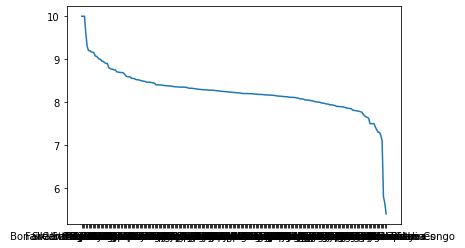

In [53]:
x, y = zip(*country_score) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [54]:
dataset.iloc[1011]

Hotel_Address                                 1 2 Serjeant s Inn Fleet Street City of London...
Additional_Number_of_Scoring                                                                639
Review_Date                                                                           2/24/2017
Average_Score                                                                               9.2
Hotel_Name                                                              Apex Temple Court Hotel
Reviewer_Nationality                                                                   Germany 
Negative_Review                                                                     No Negative
Review_Total_Negative_Word_Counts                                                             0
Total_Number_of_Reviews                                                                    2619
Positive_Review                                I spend the weekend in the Apex Hotel with my...
Review_Total_Positive_Word_Counts       

In [55]:
pandas.to_datetime('2/24/2017')

Timestamp('2017-02-24 00:00:00')

In [0]:
data = [1]*(len(dataset))
count = pandas.DataFrame(data, columns = ['Count']) 

In [57]:
date_review = dataset[['Review_Date', 'Reviewer_Score']]
date_review = pandas.concat([date_review, count], axis=1, sort=False)
date_review = date_review.set_index('Review_Date')
date_review.head()

,Reviewer_Score,Count
Review_Date,,
8/3/2017,2.9,1
8/3/2017,7.5,1
7/31/2017,7.1,1
7/31/2017,3.8,1
7/24/2017,6.7,1


In [58]:
date_review.index

Index(['8/3/2017', '8/3/2017', '7/31/2017', '7/31/2017', '7/24/2017',
       '7/24/2017', '7/17/2017', '7/17/2017', '7/9/2017', '7/8/2017',
       ...
       '9/27/2015', '9/26/2015', '9/20/2015', '9/7/2015', '9/6/2015',
       '8/30/2015', '8/22/2015', '8/19/2015', '8/17/2015', '8/9/2015'],
      dtype='object', name='Review_Date', length=515738)

In [0]:
date_review.index = pandas.to_datetime(date_review.index)

In [60]:
date_review.index

DatetimeIndex(['2017-08-03', '2017-08-03', '2017-07-31', '2017-07-31',
               '2017-07-24', '2017-07-24', '2017-07-17', '2017-07-17',
               '2017-07-09', '2017-07-08',
               ...
               '2015-09-27', '2015-09-26', '2015-09-20', '2015-09-07',
               '2015-09-06', '2015-08-30', '2015-08-22', '2015-08-19',
               '2015-08-17', '2015-08-09'],
              dtype='datetime64[ns]', name='Review_Date', length=515738, freq=None)

In [61]:
date_review['Year'] = date_review.index.year
date_review['Month'] = date_review.index.month
date_review['WeekDay Name'] = date_review.index.weekday_name
date_review.sample(5, random_state=0)

,Reviewer_Score,Count,Year,Month,WeekDay Name
Review_Date,,,,,
2017-07-14,5.0,1,2017,7,Friday
2016-10-03,8.8,1,2016,10,Monday
2017-06-27,7.5,1,2017,6,Tuesday
2016-06-21,9.2,1,2016,6,Tuesday
2016-09-17,7.9,1,2016,9,Saturday


In [0]:
sns.set(rc={'figure.figsize':(15, 4)})

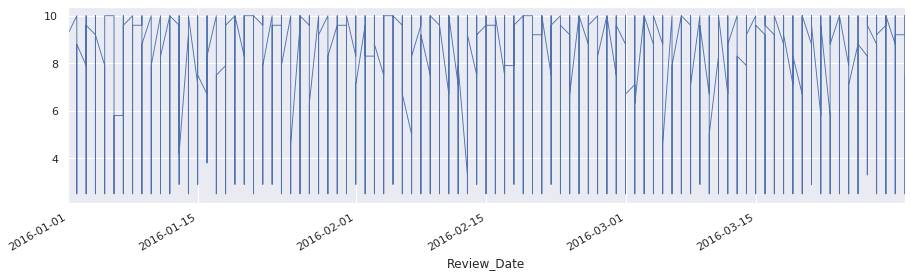

In [63]:
date_review.loc['2016-01':'2016-03', 'Reviewer_Score'].plot(linewidth=0.9);

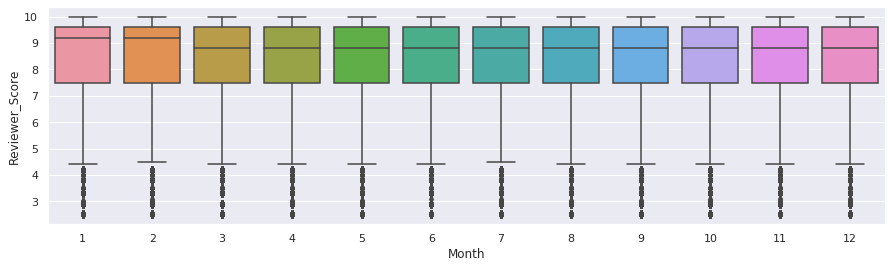

In [64]:
sns.boxplot(data=date_review, x='Month', y='Reviewer_Score')

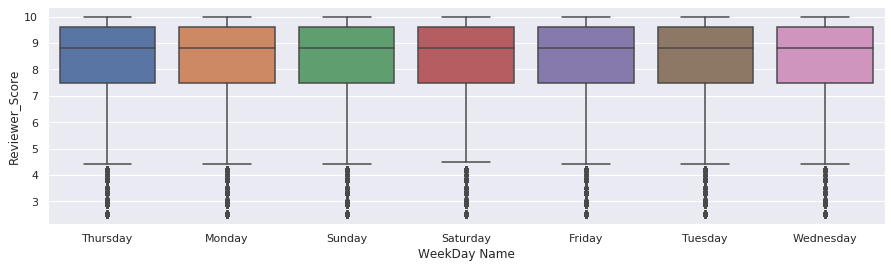

In [65]:
sns.boxplot(data= date_review, x='WeekDay Name', y='Reviewer_Score');

In [66]:
date_review_weekly_mean = date_review['Reviewer_Score'].resample('W').mean()
date_review_weekly_mean.head()

Review_Date
2015-08-09    8.319059
2015-08-16    8.398819
2015-08-23    8.360133
2015-08-30    8.429600
2015-09-06    8.414132
Freq: W-SUN, Name: Reviewer_Score, dtype: float64

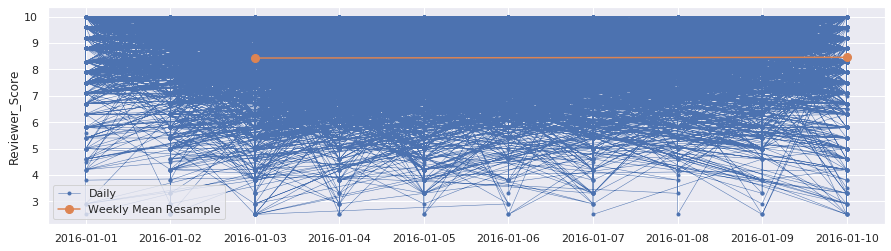

In [67]:
# Start and end of the date range to extract
start, end = '2016-01-01', '2016-01-10'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(date_review.loc[start:end, 'Reviewer_Score'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(date_review_weekly_mean.loc[start:end],marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Reviewer_Score')
ax.legend();

In [68]:
date_review_monthly = pandas.DataFrame()
date_review_monthly['Reviewer_Score'] = date_review['Reviewer_Score'].resample('M').mean()
date_review_monthly['Review_Count'] = date_review['Count'].resample('M').sum()
date_review_monthly.head()

,Reviewer_Score,Review_Count
Review_Date,,
2015-08-31,8.378059,19320
2015-09-30,8.255558,19738
2015-10-31,8.195710,19486
2015-11-30,8.316388,18056
2015-12-31,8.466291,17927


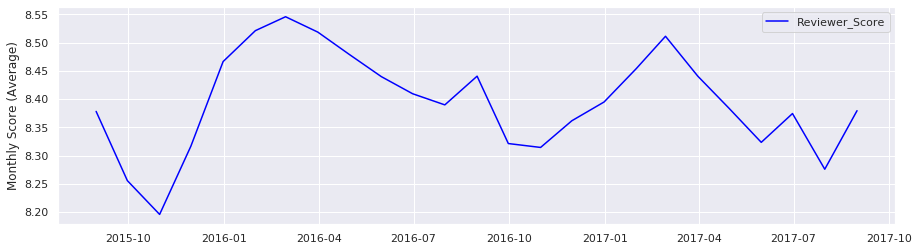

In [69]:
fig, ax = plt.subplots()
ax.plot(date_review_monthly['Reviewer_Score'], color='blue', label='Reviewer_Score')
ax.legend()
ax.set_ylabel('Monthly Score (Average)');

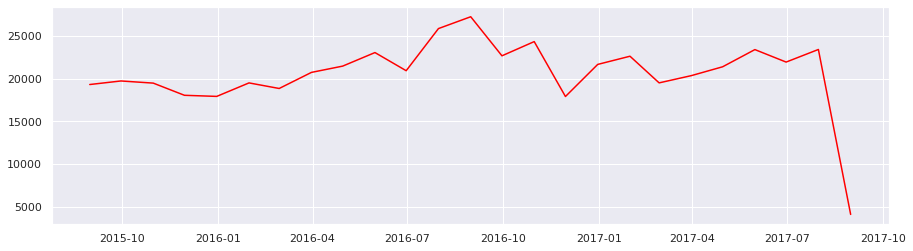

In [70]:
fig, ax = plt.subplots()
ax.plot(date_review_monthly['Review_Count'], color='red', label='Review_Count')

In [0]:
df = date_review_monthly
normalized_date_review_monthly = (df - df.min())/(df.max() - df.min())

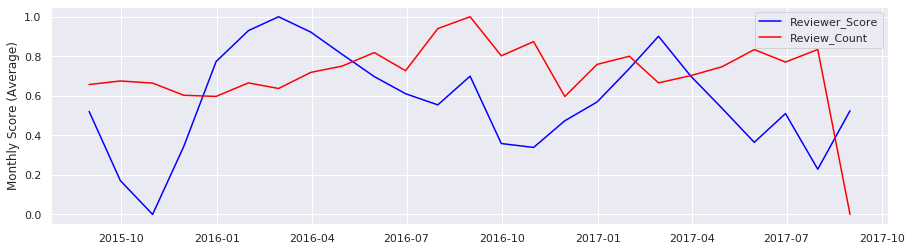

In [72]:
date_review_monthly = normalized_date_review_monthly
fig, ax = plt.subplots()
ax.plot(date_review_monthly['Reviewer_Score'], color='blue', label='Reviewer_Score')
ax.plot(date_review_monthly['Review_Count'], color='red', label='Review_Count')
ax.legend()
ax.set_ylabel('Monthly Score (Average)');

In [73]:
dataset.iloc[1011]

Hotel_Address                                 1 2 Serjeant s Inn Fleet Street City of London...
Additional_Number_of_Scoring                                                                639
Review_Date                                                                           2/24/2017
Average_Score                                                                               9.2
Hotel_Name                                                              Apex Temple Court Hotel
Reviewer_Nationality                                                                   Germany 
Negative_Review                                                                     No Negative
Review_Total_Negative_Word_Counts                                                             0
Total_Number_of_Reviews                                                                    2619
Positive_Review                                I spend the weekend in the Apex Hotel with my...
Review_Total_Positive_Word_Counts       

In [0]:
trip_type = pandas.DataFrame()

In [75]:
#Creating list of business and leisure trips.
business = []
leisure = []
for i in tqdm(range(len(dataset))):
    if 'Leisure' in dataset.iloc[i]['Tags']:
        leisure.append(1)
    else:
        leisure.append(0)
    if 'Business' in dataset.iloc[i]['Tags']:
        business.append(1)
    else:
        business.append(0)

100%|██████████| 515738/515738 [02:51<00:00, 3012.05it/s]


In [76]:
trip_type['Review_Date'] = dataset['Review_Date']
trip_type['Business'] = business
trip_type['Leisure'] = leisure
trip_type.head(5)

,Review_Date,Business,Leisure
0,8/3/2017,0,1
1,8/3/2017,0,1
2,7/31/2017,0,1
3,7/31/2017,0,1
4,7/24/2017,0,1


In [0]:
trip_type = trip_type.set_index('Review_Date')
trip_type.index = pandas.to_datetime(trip_type.index)

In [78]:
trip_type.head(5)

,Business,Leisure
Review_Date,,
2017-08-03,0,1
2017-08-03,0,1
2017-07-31,0,1
2017-07-31,0,1
2017-07-24,0,1


In [79]:
#Creating Seperate dataframe for monthly leisure and business trips.
trip_type_monthly = pandas.DataFrame()
trip_type_monthly['Leisure'] = trip_type['Leisure'].resample('M').sum()
trip_type_monthly['Business'] = trip_type['Business'].resample('M').sum()
trip_type_monthly.head()

,Leisure,Business
Review_Date,,
2015-08-31,17096,1771
2015-09-30,15966,3234
2015-10-31,15030,3955
2015-11-30,13324,4273
2015-12-31,14468,3024


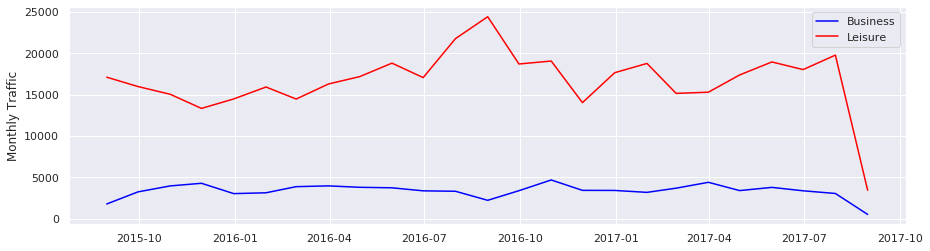

In [80]:
#Actual value plot of monthly traffic of Leisure trip and Business Trip
fig, ax = plt.subplots()
ax.plot(trip_type_monthly['Business'], color='blue', label='Business')
ax.plot(trip_type_monthly['Leisure'], color='red', label='Leisure')
ax.legend()
ax.set_ylabel('Monthly Traffic');

In [0]:
df = trip_type_monthly
normalized_trip_type_monthly = (df - df.min())/(df.max() - df.min())

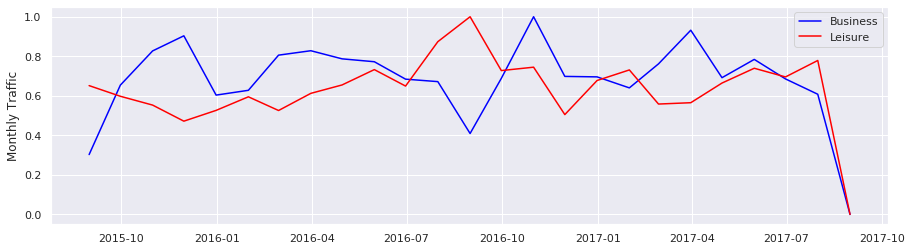

In [82]:
#Normalized value of monthly traffic of Leisure trip and Business Trip.
trip_type_monthly = normalized_trip_type_monthly
fig, ax = plt.subplots()
ax.plot(trip_type_monthly['Business'], color='blue', label='Business')
ax.plot(trip_type_monthly['Leisure'], color='red', label='Leisure')
ax.legend()
ax.set_ylabel('Monthly Traffic');